In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
def generate_dataset(num_samples=10000, img_size=50):
    images = np.zeros((num_samples, img_size, img_size, 1), dtype=np.float32)
    labels = np.zeros((num_samples, 2), dtype=np.float32)

    for i in range(num_samples):
        x = np.random.randint(0, img_size)
        y = np.random.randint(0, img_size)
        images[i, x, y, 0] = 255
        labels[i] = [x, y]

    return images, labels

In [3]:
train_images, train_labels = generate_dataset(num_samples=8000, img_size=50)
val_images, val_labels = generate_dataset(num_samples=2000, img_size=50)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
250/250 [==============================] - 302s 1s/step - loss: 33.4267 - val_loss: 3.9297
Epoch 2/10
250/250 [==============================] - 312s 1s/step - loss: 2.4715 - val_loss: 1.7775
Epoch 3/10
250/250 [==============================] - 312s 1s/step - loss: 1.4942 - val_loss: 1.3310
Epoch 4/10
250/250 [==============================] - 310s 1s/step - loss: 1.2073 - val_loss: 1.8758
Epoch 5/10
250/250 [==============================] - 309s 1s/step - loss: 1.1527 - val_loss: 0.7701
Epoch 6/10
250/250 [==============================] - 307s 1s/step - loss: 0.7967 - val_loss: 0.8559
Epoch 7/10
250/250 [==============================] - 301s 1s/step - loss: 0.8962 - val_loss: 0.8840
Epoch 8/10
250/250 [==============================] - 311s 1s/step - loss: 0.9527 - val_loss: 1.0598
Epoch 9/10
250/250 [==============================] - 302s 1s/step - loss: 1.1329 - val_loss: 0.7135
Epoch 10/10
250/250 [==============================] - 312s 1s/step - loss: 0.4950 - val_l

In [4]:
loss = model.evaluate(val_images, val_labels)
print(f'Validation Loss: {loss}')


63/63 [==============================] - 17s 265ms/step - loss: 0.4281
Validation Loss: 0.4281422197818756


In [5]:
predictions = model.predict(val_images)

63/63 [==============================] - 17s 260ms/step


In [7]:
print(predictions)

[[19.683546   20.986965  ]
 [37.168552   31.936573  ]
 [16.333864   14.167496  ]
 ...
 [27.915897   26.113724  ]
 [20.07092    22.367336  ]
 [39.154175    0.91993314]]


In [8]:
def plot_results(images, true_coords, pred_coords, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].reshape(50, 50), cmap='gray')
        plt.scatter(true_coords[i][1], true_coords[i][0], color='green', label='True')
        plt.scatter(pred_coords[i][1], pred_coords[i][0], color='red', label='Predicted')
        plt.legend()
    plt.show()

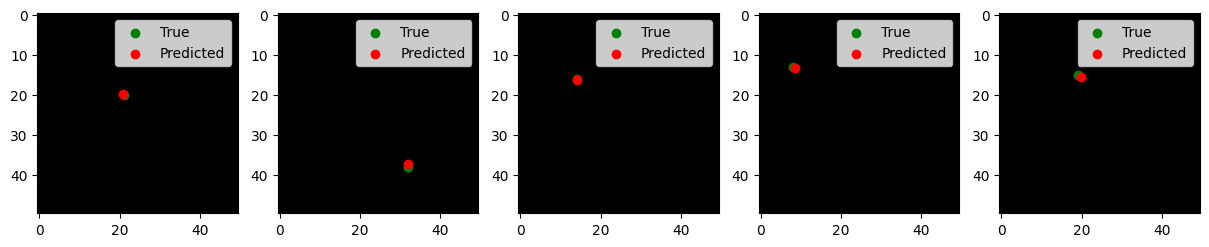

In [9]:
plot_results(val_images, val_labels, predictions, num_samples=5)

In [ ]:
# model.save('pixel_coordinate_predictor.h5')


# with open('training_history.npy', 'wb') as f:
#     np.save(f, history.history)


# np.save('train_images.npy', train_images)
# np.save('train_labels.npy', train_labels)
# np.save('val_images.npy', val_images)
# np.save('val_labels.npy', val_labels)


# requirements = """
# tensorflow==2.10.0
# numpy
# matplotlib
# """

# with open('requirements.txt', 'w') as f:
#     f.write(requirements)